In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
data = pd.read_csv('Indian Airlines.csv')

In [40]:
df = pd.DataFrame(data)

In [41]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Cleaning

In [17]:
df.dropna(inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis 

In [5]:
# Set visual style
sns.set(style="whitegrid")

In [6]:
# Create a route column for route-based analysis
df['route'] = df['source_city'] + " → " + df['destination_city']

# Price Distribution

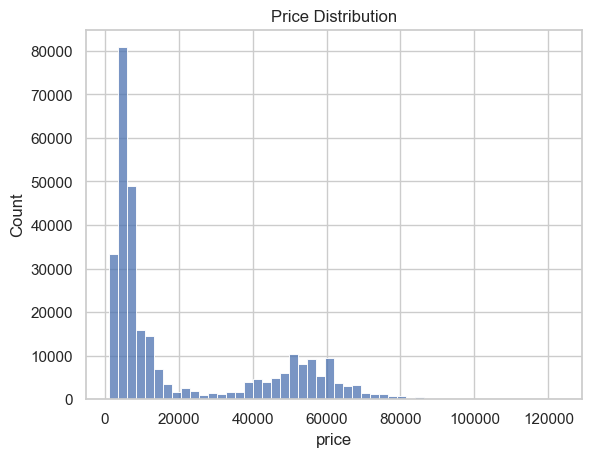

In [27]:
sns.histplot(df['price'], bins=50)
plt.title("Price Distribution")
plt.show()

## Average Price by Airline

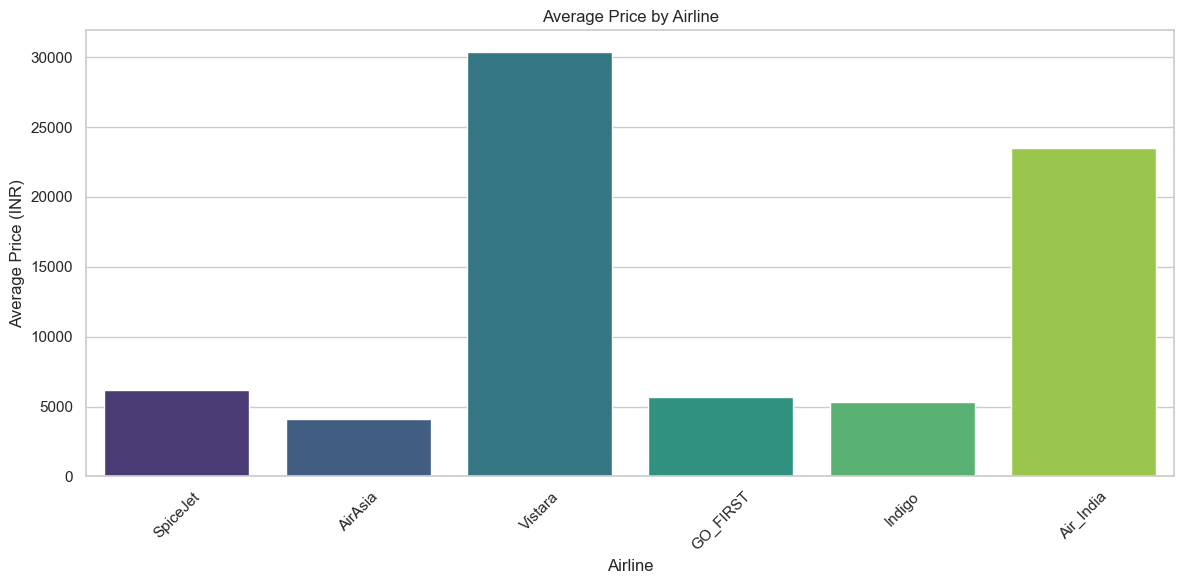

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='airline', y='price', estimator=np.mean, hue='airline', errorbar=None, palette="viridis")
plt.title("Average Price by Airline")
plt.xticks(rotation=45)
plt.ylabel("Average Price (INR)")
plt.xlabel("Airline")
plt.tight_layout()
plt.show()

## Stops vs. Price (Box Plot)

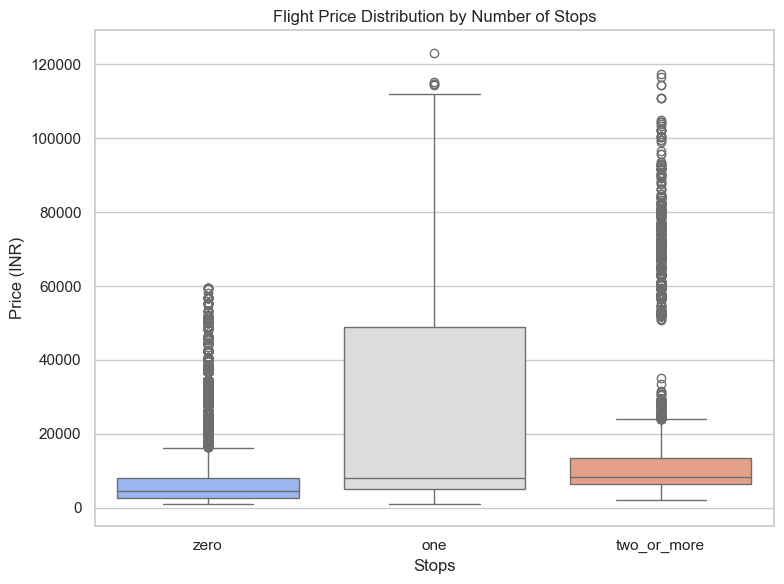

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stops', y='price', hue='stops', palette="coolwarm")
plt.title("Flight Price Distribution by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()


## Price by Source-Destination

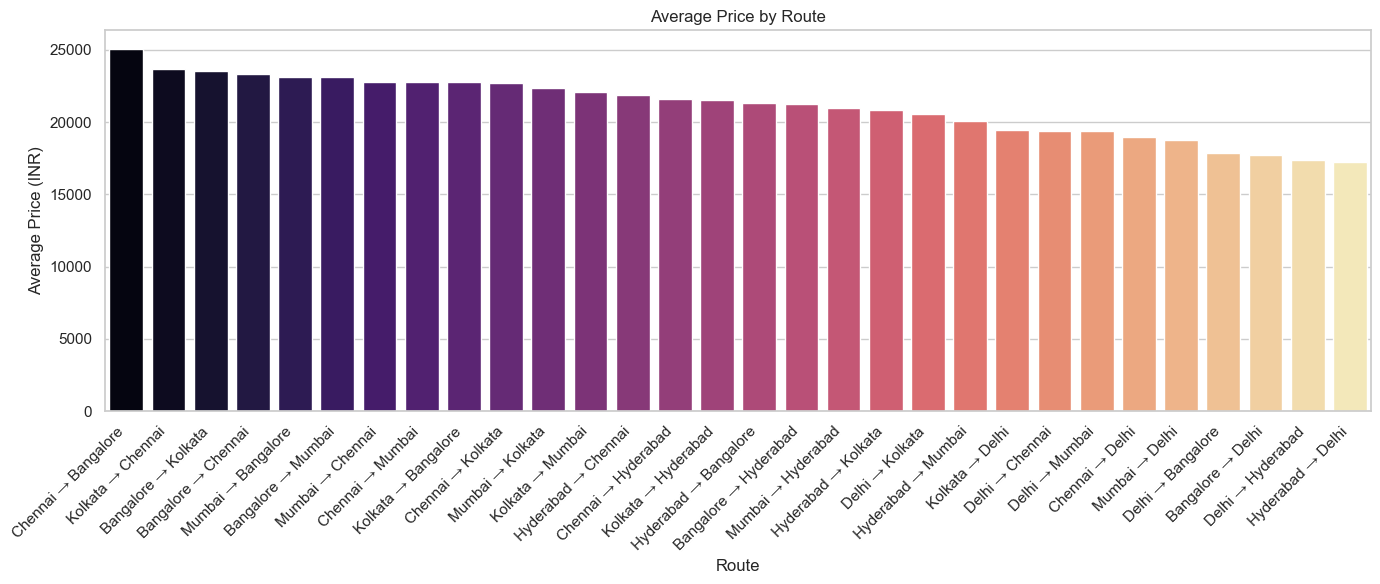

In [9]:
route_prices = df.groupby('route')['price'].mean().reset_index().sort_values(by='price', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(data=route_prices, x='route', y='price', hue='route', palette="magma")
plt.title("Average Price by Route")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Price (INR)")
plt.xlabel("Route")
plt.tight_layout()
plt.show()


## Departure Time vs. Average Price

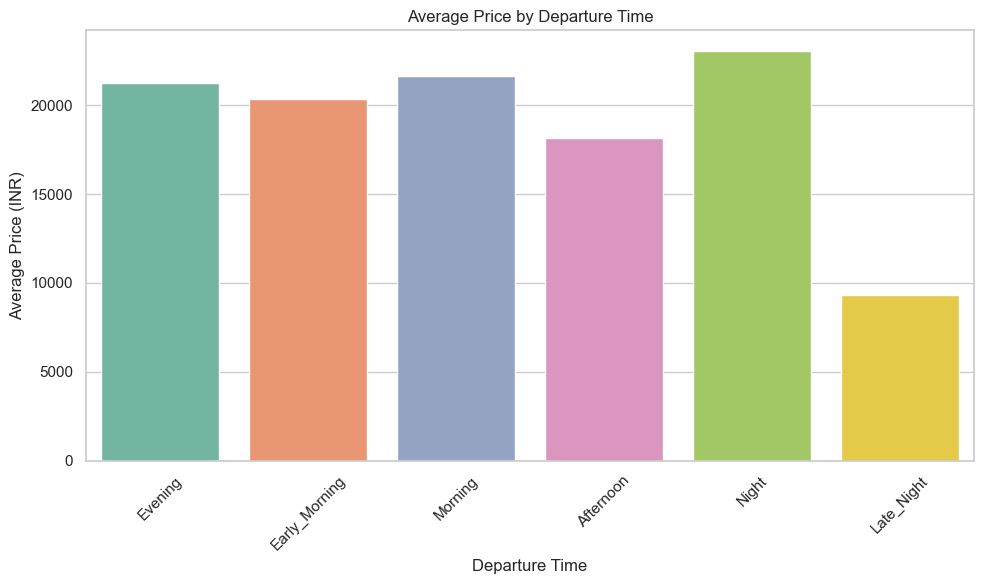

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='departure_time', y='price', hue='departure_time', estimator=np.mean, errorbar=None, palette="Set2")
plt.title("Average Price by Departure Time")
plt.xticks(rotation=45)
plt.ylabel("Average Price (INR)")
plt.xlabel("Departure Time")
plt.tight_layout()
plt.show()


## Duration vs. Price

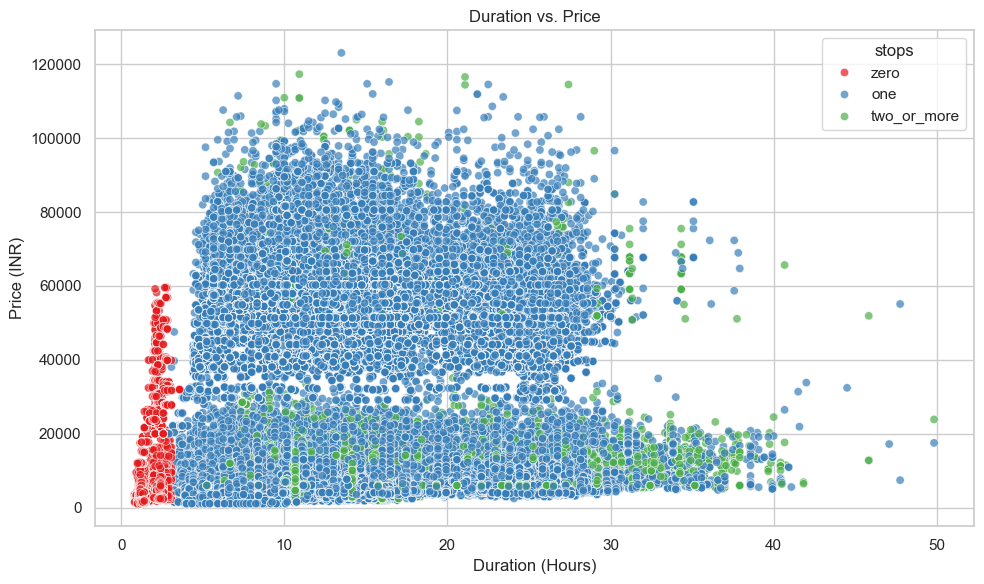

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='stops', palette="Set1", alpha=0.7)
plt.title("Duration vs. Price")
plt.xlabel("Duration (Hours)")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()

# Statistical Analysis

# T-Test (0-stop vs 1-stop)

In [51]:
from scipy.stats import ttest_ind

stop0 = df[df['stops'] == 'zero']['price']
stop1 = df[df['stops'] == 'one']['price']

t_stat, p_value = ttest_ind(stop0, stop1, equal_var=False)
print("T-test p-value:", p_value)

T-test p-value: 0.0


# ANOVA (Airline-wise Fare Difference)

In [31]:
from scipy.stats import f_oneway
airlines = df['airline'].unique()
fare_groups = [df[df['airline'] == a]['price'] for a in airlines]

f_stat, p_val = f_oneway(*fare_groups)
print("ANOVA p-value:", p_val)


ANOVA p-value: 0.0


# Correlation (Duration & Price)

In [53]:
print("Correlation between Duration and Price:", df['duration'].corr(df['price']))

Correlation between Duration and Price: 0.20422236784542847


# Chi-Square (Total Stops vs. Price Category)

In [55]:
df['Price_Category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])
ct = pd.crosstab(df['stops'], df['Price_Category'])

from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("Chi-square p-value:", p)

Chi-square p-value: 0.0


##  Key Insights – Indian Flight Fare Analysis


## Summary
Flight prices might fluctuate depending on the airline, trip duration, number of stops, and how early you book.  In this project, we evaluated Indian domestic flight data to determine what factors influence airfare.The dataset comprises information on the airline, source and destination cities, class (economy/business), stops, timings, duration, and pricing.  Our goal was to figure out what causes pricing discrepancies and how certain aspects are related to fare adjustments.
We began by cleaning the data, removing duplicates, addressing missing values, and translating time/duration into acceptable representations.  Then, during the EDA phase, we used graphs (bar, box, scatter) to investigate how prices vary depending on characteristics such as stops, airlines, and trip time.
To support our findings, we utilized statistical tests such as ANOVA and t-tests to see whether pricing differences between groups (such as airlines or stop counts) were significant.